In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

# If running on separate laptop/computer, this will need commenting out 
plt.style.use('pythonStyle')
import pythonStyle as ed

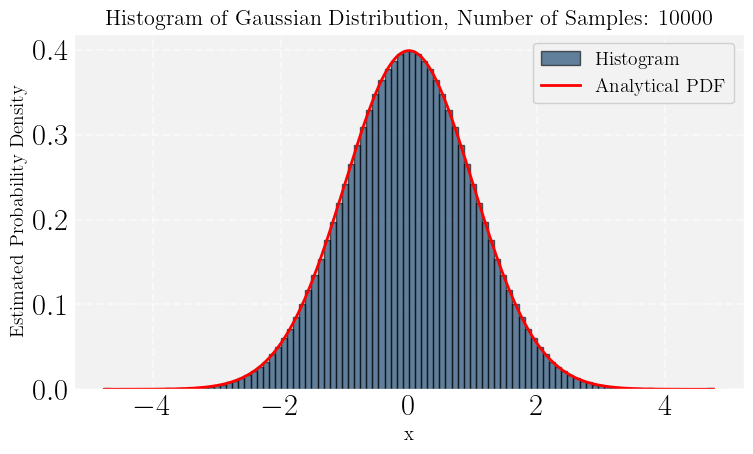

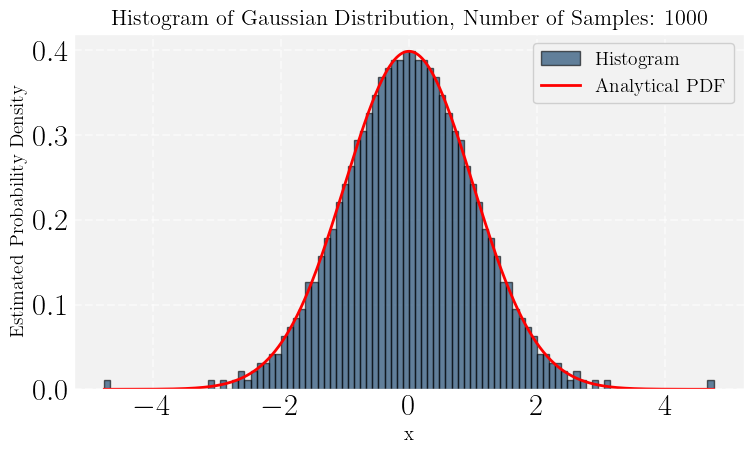

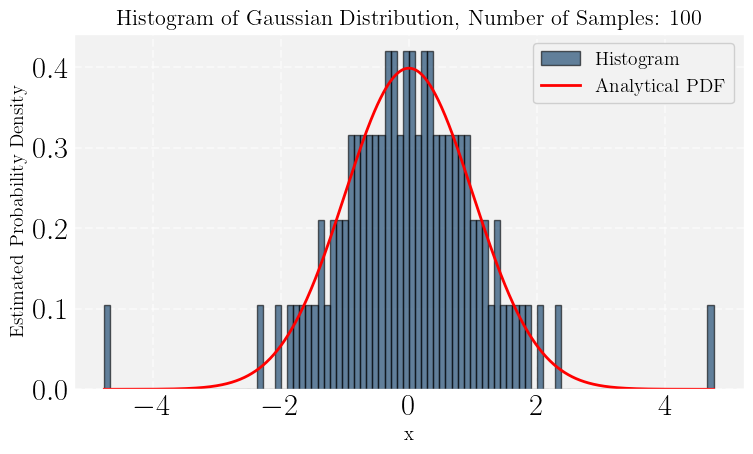

In [20]:
# PDF Histogram

def calc_gaussianDistribution(u, mu=0.0, sigma=1.0):
    return norm.ppf(u, loc=mu, scale=sigma)

def plot_histogram(data, bins=100, title='Histogram', xlabel='x', ylabel='Estimated Probability Density',
                   pdf_func=None, pdf_label='Analytical PDF', x_range=None):
    
    plt.figure(figsize=(8, 5))
    
    # Plot Histogram
    _, bins, _ = plt.hist(data, bins=bins, edgecolor='black', density=True, alpha=0.6, label='Histogram')
    
    # Plot Analytical PDF
    if pdf_func is not None and x_range is not None:
        x_vals = np.linspace(x_range[0], x_range[1], 1000)
        y_vals = pdf_func(x_vals)
        plt.plot(x_vals, y_vals, 'r-', linewidth=2, label=pdf_label)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

# uniform samples
eps = 1e-6
u_values = np.linspace(eps, 1 - eps, 10000)

# GAUSSIAN
data_gaussian = calc_gaussianDistribution(u_values, mu=0.0, sigma=1.0)
plot_histogram(
    data_gaussian,
    title='Histogram of Gaussian Distribution,  Number of Samples: 10000',
    pdf_func=lambda x: norm.pdf(x, loc=0.0, scale=1.0),
    x_range=(min(data_gaussian), max(data_gaussian))
)

# uniform samples
eps = 1e-6
u_values = np.linspace(eps, 1 - eps, 1000)

# GAUSSIAN
data_gaussian = calc_gaussianDistribution(u_values, mu=0.0, sigma=1.0)
plot_histogram(
    data_gaussian,
    title='Histogram of Gaussian Distribution,  Number of Samples: 1000',
    pdf_func=lambda x: norm.pdf(x, loc=0.0, scale=1.0),
    x_range=(min(data_gaussian), max(data_gaussian))
)

# uniform samples
eps = 1e-6
u_values = np.linspace(eps, 1 - eps, 100)

# GAUSSIAN
data_gaussian = calc_gaussianDistribution(u_values, mu=0.0, sigma=1.0)
plot_histogram(
    data_gaussian,
    title='Histogram of Gaussian Distribution, Number of Samples: 100',
    pdf_func=lambda x: norm.pdf(x, loc=0.0, scale=1.0),
    x_range=(min(data_gaussian), max(data_gaussian))
)

In [21]:
# MEAN AS A FUNCTION OF SAMPLE SIZE

def calc_expectation(n, mean=0, std=1):
    # Generate n samples from a Gaussian distribution and calculate the mean from sampling
    samples = np.random.normal(loc=mean, scale=np.sqrt(std), size=int(n))
    return np.mean(samples)

def plot_expectationSampleSize():
    sample_sizes = np.linspace(10, 10000, 250)
    expectations = []

    # Use a fixed mean and std for the Gaussian
    true_mean = 0
    variance = 1

    for n in sample_sizes:
        exp_val = calc_expectation(n, mean=true_mean, variance=variance)
        expectations.append(exp_val)

    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, expectations, label="Sample Mean")
    plt.axhline(y=true_mean, color='r', linestyle='--', label="True Mean")
    plt.xlabel("Sample Size", fontsize=14)
    plt.ylabel("Expectation Value", fontsize=14)
    plt.title("Convergence of Sample Mean with Increasing Sample Size", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the plot function
plot_expectationSampleSize()


TypeError: calc_expectation() got an unexpected keyword argument 'variance'

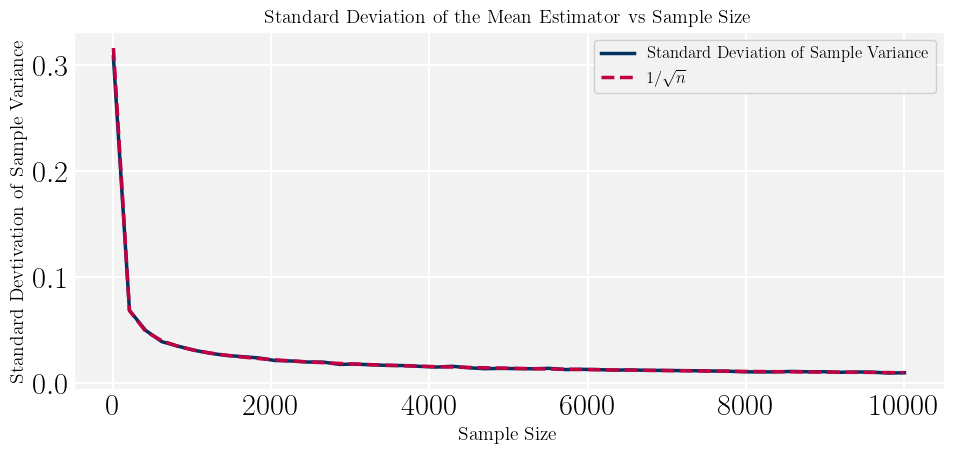

In [28]:
# STD OF THE MEAN AGAINST SAMPLE SIZE 

def std_of_mean_estimator(n, mean=0, std=1, repetitions=10000):
    # For sample size n, estimate variance of the sample variance estimator
    sample_std = np.zeros(repetitions)
    for i in range(repetitions):
        samples = np.random.normal(loc=mean, scale=np.sqrt(std), size=int(n))
        sample_std[i] = np.mean(samples) 
    return np.std(sample_std, ddof=1)  

def plot_std_of_variance():
    sample_sizes = np.linspace(10, 10000, 50, dtype=int)
    sample_sizes_root = np.linspace(10, 10000, 50, dtype=int)
    std_of_var = []

    mean = 0
    true_std = 1

    for n in sample_sizes:
        std = std_of_mean_estimator(n, mean=mean, std=true_std, repetitions=1000)
        std_of_var.append(std)

    plt.figure(figsize=(10, 5))
    plt.xlabel("Sample Size", fontsize=14)
    plt.ylabel("Standard Devtivation of Sample Variance", fontsize=14)
    plt.title("Standard Deviation of the Mean Estimator vs Sample Size", fontsize=14)
    plt.plot(sample_sizes, std_of_var, label='Standard Deviation of Sample Variance')
    plt.plot(sample_sizes_root, 1 / np.sqrt(sample_sizes_root), label=r'$1/\sqrt{n}$', linestyle='--')
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()

# Run the plot function
plot_std_of_variance()

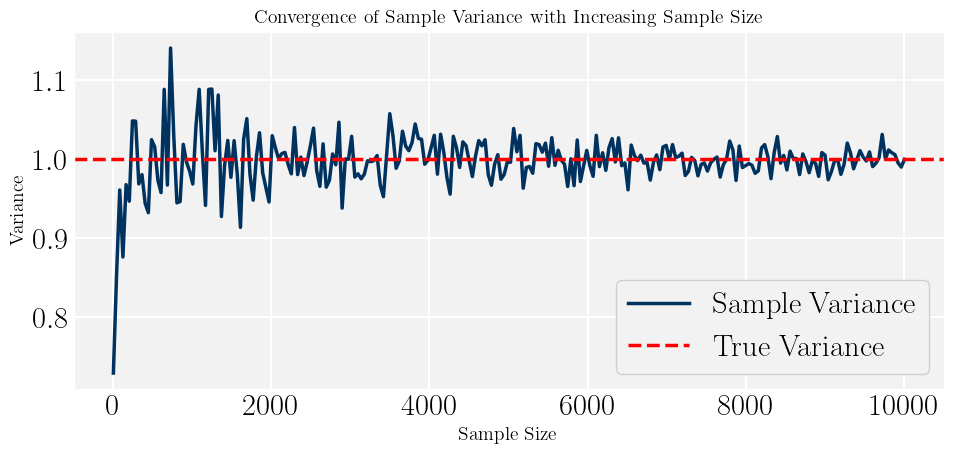

In [ ]:
# VARIANCE AGAINST SAMPLE SIZE

# Second cumlant moment (variance) as a function of sample size
def calc_variance(n, mean=0, variance=1):
    # Generate n samples from a Gaussian distribution and calculate the variance from sampling
    samples = np.random.normal(loc=mean, scale=np.sqrt(variance), size=int(n))
    return np.var(samples)

def plot_expectationSampleSize():
    sample_sizes = np.linspace(10, 10000, 250)
    expectations = []

    # Use a fixed mean and variance for the Gaussian
    mean = 0
    true_variance = 1

    for n in sample_sizes:
        exp_val = calc_variance(n, mean=mean, variance=true_variance)
        expectations.append(exp_val)

    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, expectations, label="Sample Variance")
    plt.axhline(y=true_variance, color='r', linestyle='--', label="True Variance")
    plt.xlabel("Sample Size", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title("Convergence of Sample Variance with Increasing Sample Size", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


# Run the plot function
plot_expectationSampleSize()

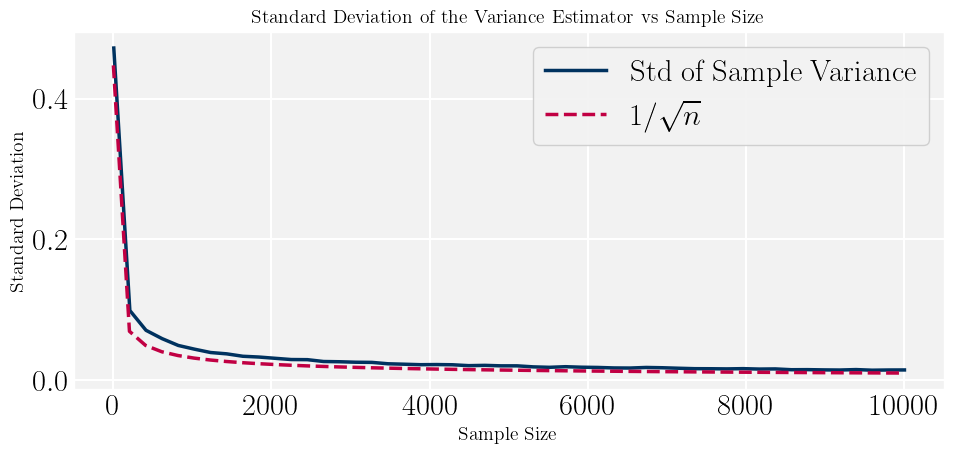

In [ ]:
# VARIANCE OF VARIANCE AGAINST SAMPLE SIZE

def std_of_variance_estimator(n, mean=0, std=1, repetitions=1000):
    # For sample size n, estimate variance of the sample variance estimator
    sample_std = np.zeros(repetitions)
    for i in range(repetitions):
        samples = np.random.normal(loc=mean, scale=np.sqrt(std), size=int(n))
        sample_std[i] = np.var(samples, ddof=1)  # use unbiased estimator
    return np.std(sample_std, ddof=1)  # variance of sample variances

def plot_std_of_variance():
    sample_sizes = np.linspace(10, 10000, 50, dtype=int)
    sample_sizes_root = np.linspace(5, 10000, 50, dtype=int)
    std_of_var = []

    mean = 0
    true_std = 1

    for n in sample_sizes:
        std = std_of_variance_estimator(n, mean=mean, std=true_std, repetitions=1000)
        std_of_var.append(std)

    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, std_of_var, label='Standard Deviation of Sample Variance')
    plt.plot(sample_sizes_root, 1 / np.sqrt(sample_sizes_root), label=r'$1/\sqrt{n}$', linestyle='--')
    plt.xlabel("Sample Size", fontsize=14)
    plt.ylabel("Standard Deviation", fontsize=14)
    plt.title("Standard Deviation of the Variance Estimator vs Sample Size", fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()

# Run the plot function
plot_std_of_variance()
